In [1]:
import pickle
import numpy as np

In [2]:
with open("train_qa.txt", "rb") as fp:   # Unpickling
    train_data =  pickle.load(fp)

In [3]:
with open("test_qa.txt", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)

In [6]:
train_data[0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [7]:
len(test_data)

1000

In [8]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [9]:
vocab = set()

In [10]:
all_data = test_data + train_data

In [11]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [12]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [13]:
vocab.add('no')
vocab.add('yes')

In [14]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [15]:
vocab_len = len(vocab) + 1 #we add an extra space to hold a 0 for Keras's pad_sequences

In [16]:
vocab_len

38

In [17]:
max_story_len = max([len(data[0]) for data in all_data])

In [18]:
max_story_len

156

In [19]:
max_question_len = max([len(data[1]) for data in all_data])

In [20]:
max_question_len

6

In [21]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [22]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [23]:
tokenizer.word_index

{'?': 1,
 'sandra': 2,
 'milk': 3,
 'discarded': 4,
 'is': 5,
 'the': 6,
 '.': 7,
 'office': 8,
 'mary': 9,
 'hallway': 10,
 'down': 11,
 'took': 12,
 'went': 13,
 'john': 14,
 'dropped': 15,
 'picked': 16,
 'apple': 17,
 'bathroom': 18,
 'got': 19,
 'football': 20,
 'there': 21,
 'no': 22,
 'travelled': 23,
 'journeyed': 24,
 'to': 25,
 'put': 26,
 'grabbed': 27,
 'kitchen': 28,
 'left': 29,
 'yes': 30,
 'in': 31,
 'garden': 32,
 'back': 33,
 'up': 34,
 'bedroom': 35,
 'moved': 36,
 'daniel': 37}

In [24]:
train_story_text = []
train_question_text = []
train_answers = []

In [25]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [26]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [27]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [28]:
len(train_story_text)

10000

In [29]:
len(train_story_seq)

10000

In [30]:
train_story_seq

[[9, 36, 25, 6, 18, 7, 2, 24, 25, 6, 35, 7],
 [9,
  36,
  25,
  6,
  18,
  7,
  2,
  24,
  25,
  6,
  35,
  7,
  9,
  13,
  33,
  25,
  6,
  35,
  7,
  37,
  13,
  33,
  25,
  6,
  10,
  7],
 [9,
  36,
  25,
  6,
  18,
  7,
  2,
  24,
  25,
  6,
  35,
  7,
  9,
  13,
  33,
  25,
  6,
  35,
  7,
  37,
  13,
  33,
  25,
  6,
  10,
  7,
  2,
  13,
  25,
  6,
  28,
  7,
  37,
  13,
  33,
  25,
  6,
  18,
  7],
 [9,
  36,
  25,
  6,
  18,
  7,
  2,
  24,
  25,
  6,
  35,
  7,
  9,
  13,
  33,
  25,
  6,
  35,
  7,
  37,
  13,
  33,
  25,
  6,
  10,
  7,
  2,
  13,
  25,
  6,
  28,
  7,
  37,
  13,
  33,
  25,
  6,
  18,
  7,
  37,
  16,
  34,
  6,
  20,
  21,
  7,
  37,
  13,
  25,
  6,
  35,
  7],
 [9,
  36,
  25,
  6,
  18,
  7,
  2,
  24,
  25,
  6,
  35,
  7,
  9,
  13,
  33,
  25,
  6,
  35,
  7,
  37,
  13,
  33,
  25,
  6,
  10,
  7,
  2,
  13,
  25,
  6,
  28,
  7,
  37,
  13,
  33,
  25,
  6,
  18,
  7,
  37,
  16,
  34,
  6,
  20,
  21,
  7,
  37,
  13,
  25,
  6,
  35,
  7,
  14,

In [31]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
  
    
    

    X = []

    Xq = []
 
    Y = []
    
    
    for story, query, answer in data:
        
       
        x = [word_index[word.lower()] for word in story]
   
        xq = [word_index[word.lower()] for word in query]
        
       
        y = np.zeros(len(word_index) + 1)
        
       
        y[word_index[answer]] = 1
        
    
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
  
        
    
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [32]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [33]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [34]:
inputs_test


array([[ 0,  0,  0, ...,  6, 35,  7],
       [ 0,  0,  0, ...,  6, 32,  7],
       [ 0,  0,  0, ...,  6, 32,  7],
       ...,
       [ 0,  0,  0, ...,  6, 17,  7],
       [ 0,  0,  0, ...,  6, 32,  7],
       [ 0,  0,  0, ..., 17, 21,  7]])

In [35]:
tokenizer.word_index['yes']

30

In [36]:
tokenizer.word_index['no']

22

In [37]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       503.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [39]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [40]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [42]:
vocab_size = len(vocab) + 1

In [43]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))


In [44]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [45]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [46]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [47]:
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [48]:
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response) 

In [49]:
answer = concatenate([response, question_encoded])

In [50]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [51]:
answer = LSTM(32)(answer)

In [52]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer) 

In [53]:
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential_1 (Sequential)   (None, None, 64)             2432      ['input_1[0][0]']             
                                                                                                  
 sequential_3 (Sequential)   (None, 6, 64)                2432      ['input_2[0][0]']             
                                                                                              

In [55]:
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 [==============================] - 4s 8ms/step - loss: 0.8804 - accuracy: 0.5029 - val_loss: 0.6951 - val_accuracy: 0.5030
Epoch 2/120
313/313 [==============================] - 3s 8ms/step - loss: 0.7044 - accuracy: 0.5011 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 3/120
313/313 [==============================] - 2s 7ms/step - loss: 0.6980 - accuracy: 0.5019 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 4/120
313/313 [==============================] - 2s 8ms/step - loss: 0.6964 - accuracy: 0.4943 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/120
313/313 [==============================] - 2s 8ms/step - loss: 0.6963 - accuracy: 0.4936 - val_loss: 0.6946 - val_accuracy: 0.4970
Epoch 6/120
313/313 [==============================] - 2s 8ms/step - loss: 0.6949 - accuracy: 0.5055 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 7/120
313/313 [==============================] - 2s 7ms/step - loss: 0.6954 - accuracy: 0.4964 - val_loss: 0.6943 - val_accuracy: 0.4970

Epoch 58/120
313/313 [==============================] - 2s 7ms/step - loss: 0.6922 - accuracy: 0.5179 - val_loss: 0.6947 - val_accuracy: 0.5040
Epoch 59/120
313/313 [==============================] - 2s 7ms/step - loss: 0.6917 - accuracy: 0.5254 - val_loss: 0.6988 - val_accuracy: 0.5010
Epoch 60/120
313/313 [==============================] - 2s 7ms/step - loss: 0.6887 - accuracy: 0.5260 - val_loss: 0.6941 - val_accuracy: 0.5150
Epoch 61/120
313/313 [==============================] - 2s 7ms/step - loss: 0.6837 - accuracy: 0.5418 - val_loss: 0.6806 - val_accuracy: 0.5350
Epoch 62/120
313/313 [==============================] - 2s 6ms/step - loss: 0.6731 - accuracy: 0.5611 - val_loss: 0.6645 - val_accuracy: 0.6030
Epoch 63/120
313/313 [==============================] - 2s 7ms/step - loss: 0.6588 - accuracy: 0.6012 - val_loss: 0.6513 - val_accuracy: 0.6380
Epoch 64/120
313/313 [==============================] - 2s 6ms/step - loss: 0.6496 - accuracy: 0.6264 - val_loss: 0.6314 - val_accuracy:

Epoch 115/120
313/313 [==============================] - 2s 7ms/step - loss: 0.3237 - accuracy: 0.8605 - val_loss: 0.3779 - val_accuracy: 0.8420
Epoch 116/120
313/313 [==============================] - 2s 6ms/step - loss: 0.3183 - accuracy: 0.8615 - val_loss: 0.3819 - val_accuracy: 0.8350
Epoch 117/120
313/313 [==============================] - 2s 6ms/step - loss: 0.3175 - accuracy: 0.8604 - val_loss: 0.3994 - val_accuracy: 0.8300
Epoch 118/120
313/313 [==============================] - 2s 6ms/step - loss: 0.3219 - accuracy: 0.8594 - val_loss: 0.3750 - val_accuracy: 0.8430
Epoch 119/120
313/313 [==============================] - 2s 6ms/step - loss: 0.3130 - accuracy: 0.8664 - val_loss: 0.4375 - val_accuracy: 0.8280
Epoch 120/120
313/313 [==============================] - 2s 6ms/step - loss: 0.3168 - accuracy: 0.8639 - val_loss: 0.3845 - val_accuracy: 0.8380


In [56]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

C:\Users\AMAN GUPTA\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


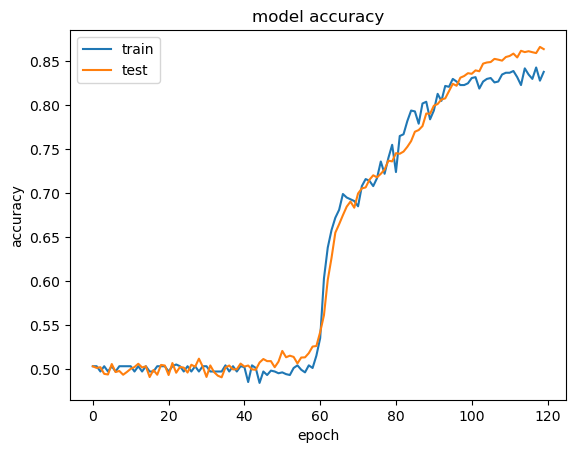

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 0s 3ms/step


In [61]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [62]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.99847907


In [63]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [64]:
my_question = "Is the football in the garden ?"

In [65]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [66]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [68]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [69]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 [==============================] - 0s 17ms/step


In [70]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.8202563
